In [46]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stt
from sklearn.decomposition import PCA

In [7]:
DATA_DIR = '../../datasets/NNN/face_roi_data.pkl'
dat = pd.read_pickle(DATA_DIR)

In [103]:
ROI = 'MF1_8_F'
roi_dat = dat[(dat['roi']==ROI) & (dat['p_value']>0.05)].reset_index(drop=True)
X = np.stack(roi_dat['img_psth'])
# X = X[:, :, 1000:]
# X = stt.zscore(X, axis=1)
# X = np.nan_to_num(X)

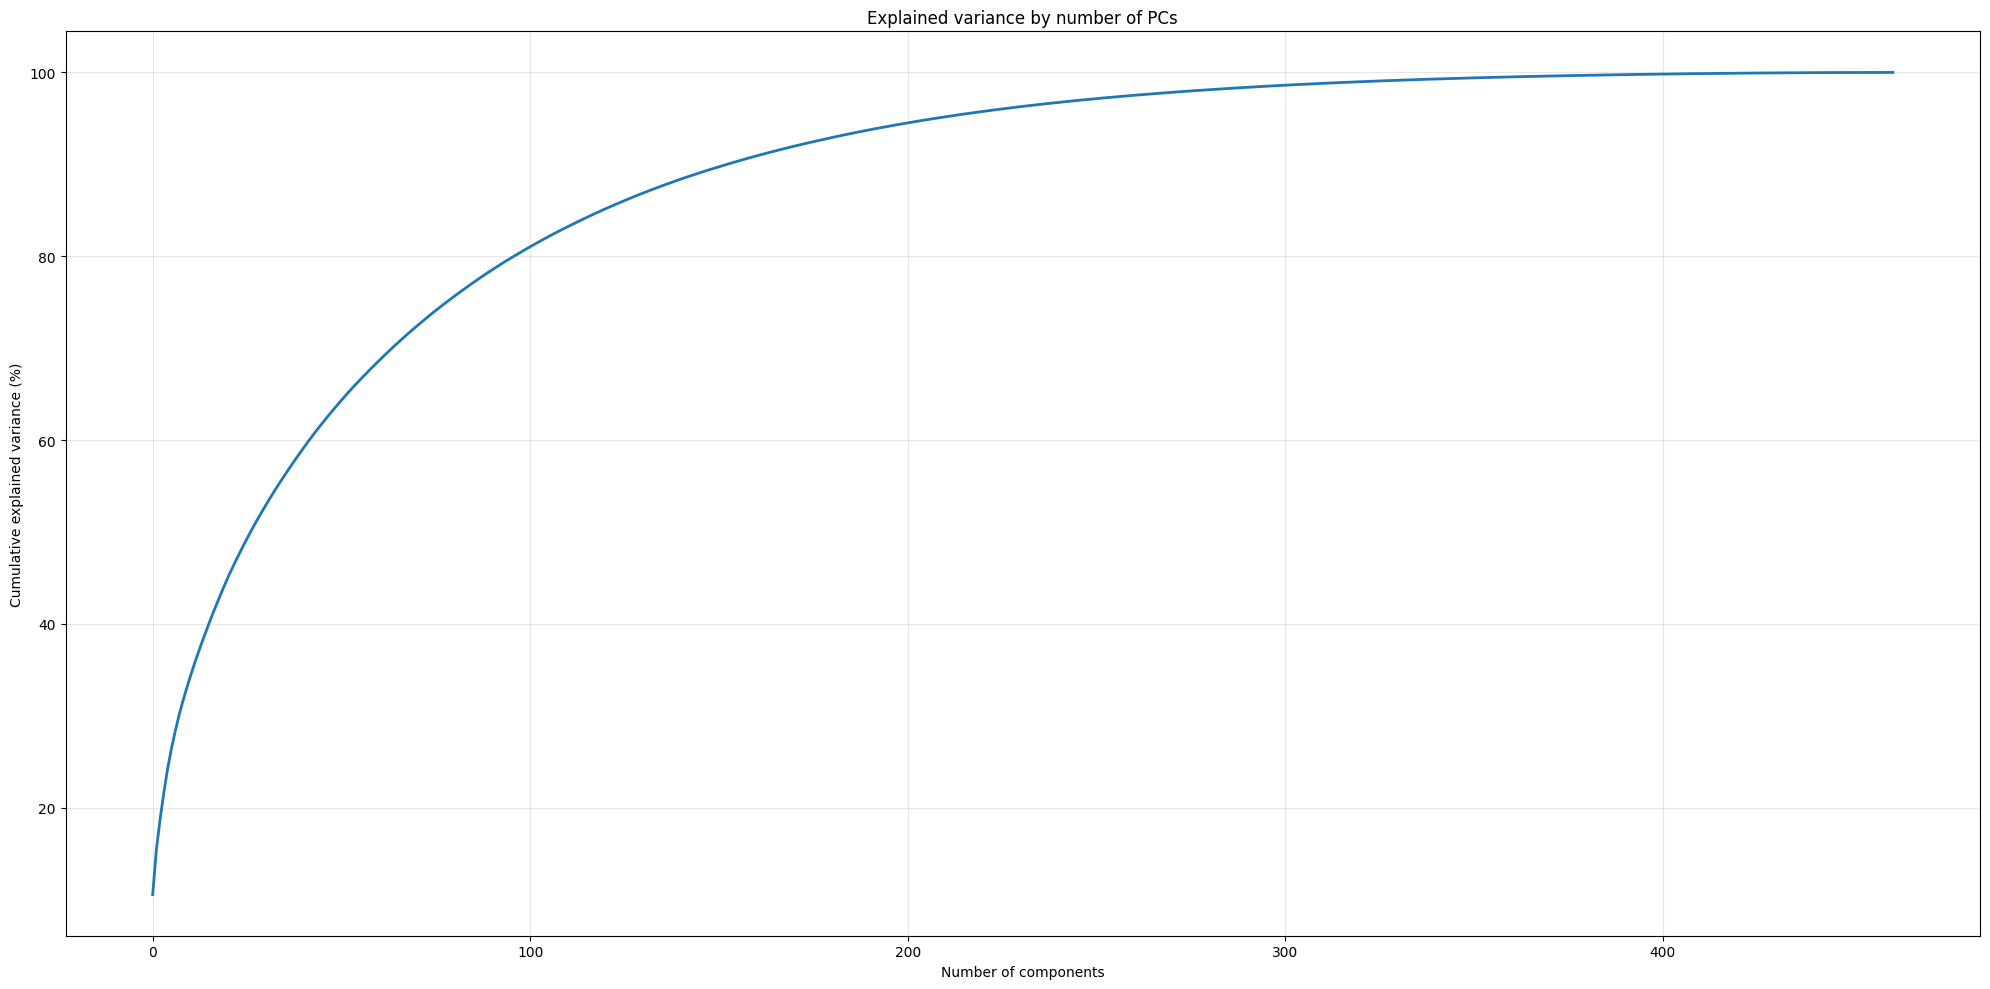

In [95]:
# X: (units, time, images)
U, T, I = X.shape
X_flat = X.reshape(U, T * I).T  # (samples, features)
X_centered = X_flat - X_flat.mean(axis=0, keepdims=True)

pca = PCA()
pca.fit(X_centered)

plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100, linewidth=2)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance (%)")
plt.title("Explained variance by number of PCs")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

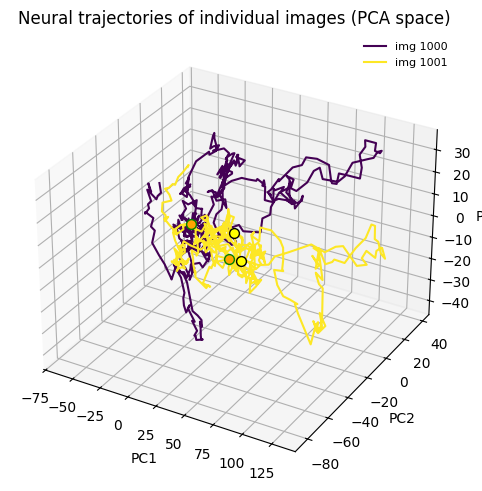

In [110]:
U, T, I = X.shape
X_2d = X.reshape(U, T*I).T  # (T*I, units)

pca = PCA(n_components=3)
lowd = pca.fit_transform(X_2d)  # (T*I, 3)

# reshape back: (time, images, components)
lowd = lowd.reshape(T, I, 3)

example_images = range(1000, 1002) # np.arange(0, 5)  # adjust indices
colors = plt.cm.viridis(np.linspace(0, 1, len(example_images)))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

for idx, c in zip(example_images, colors):
    traj = lowd[:, idx, :]  # (time, 3)
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2],
            color=c, label=f"img {idx}")
    ax.scatter(traj[0, 0], traj[0, 1], traj[0, 2],
               s=50, c='yellow', edgecolor='black')  # start (t=0)
    ax.scatter(traj[49, 0], traj[49, 1], traj[49, 2],
               s=50, c='orange', edgecolor='green')  # onset (t=49)

ax.set_title("Neural trajectories of individual images (PCA space)")
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
ax.legend(frameon=False, fontsize=8)
plt.tight_layout()
plt.show()

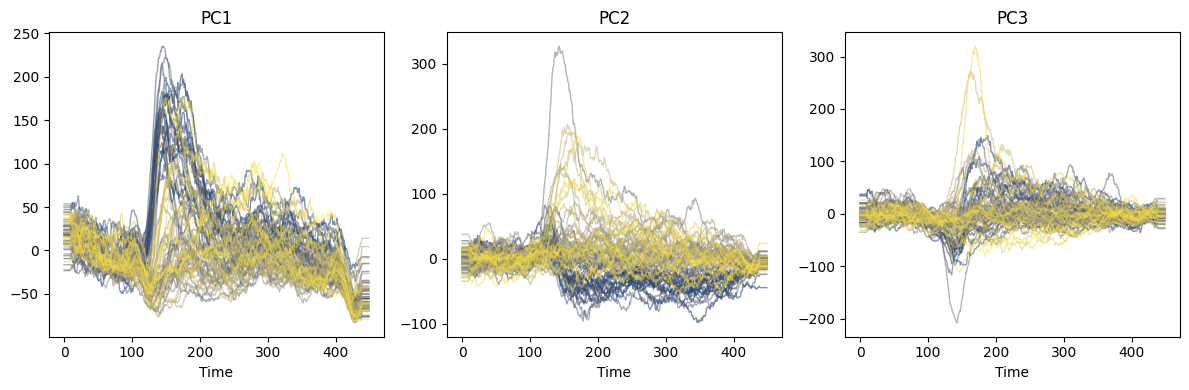

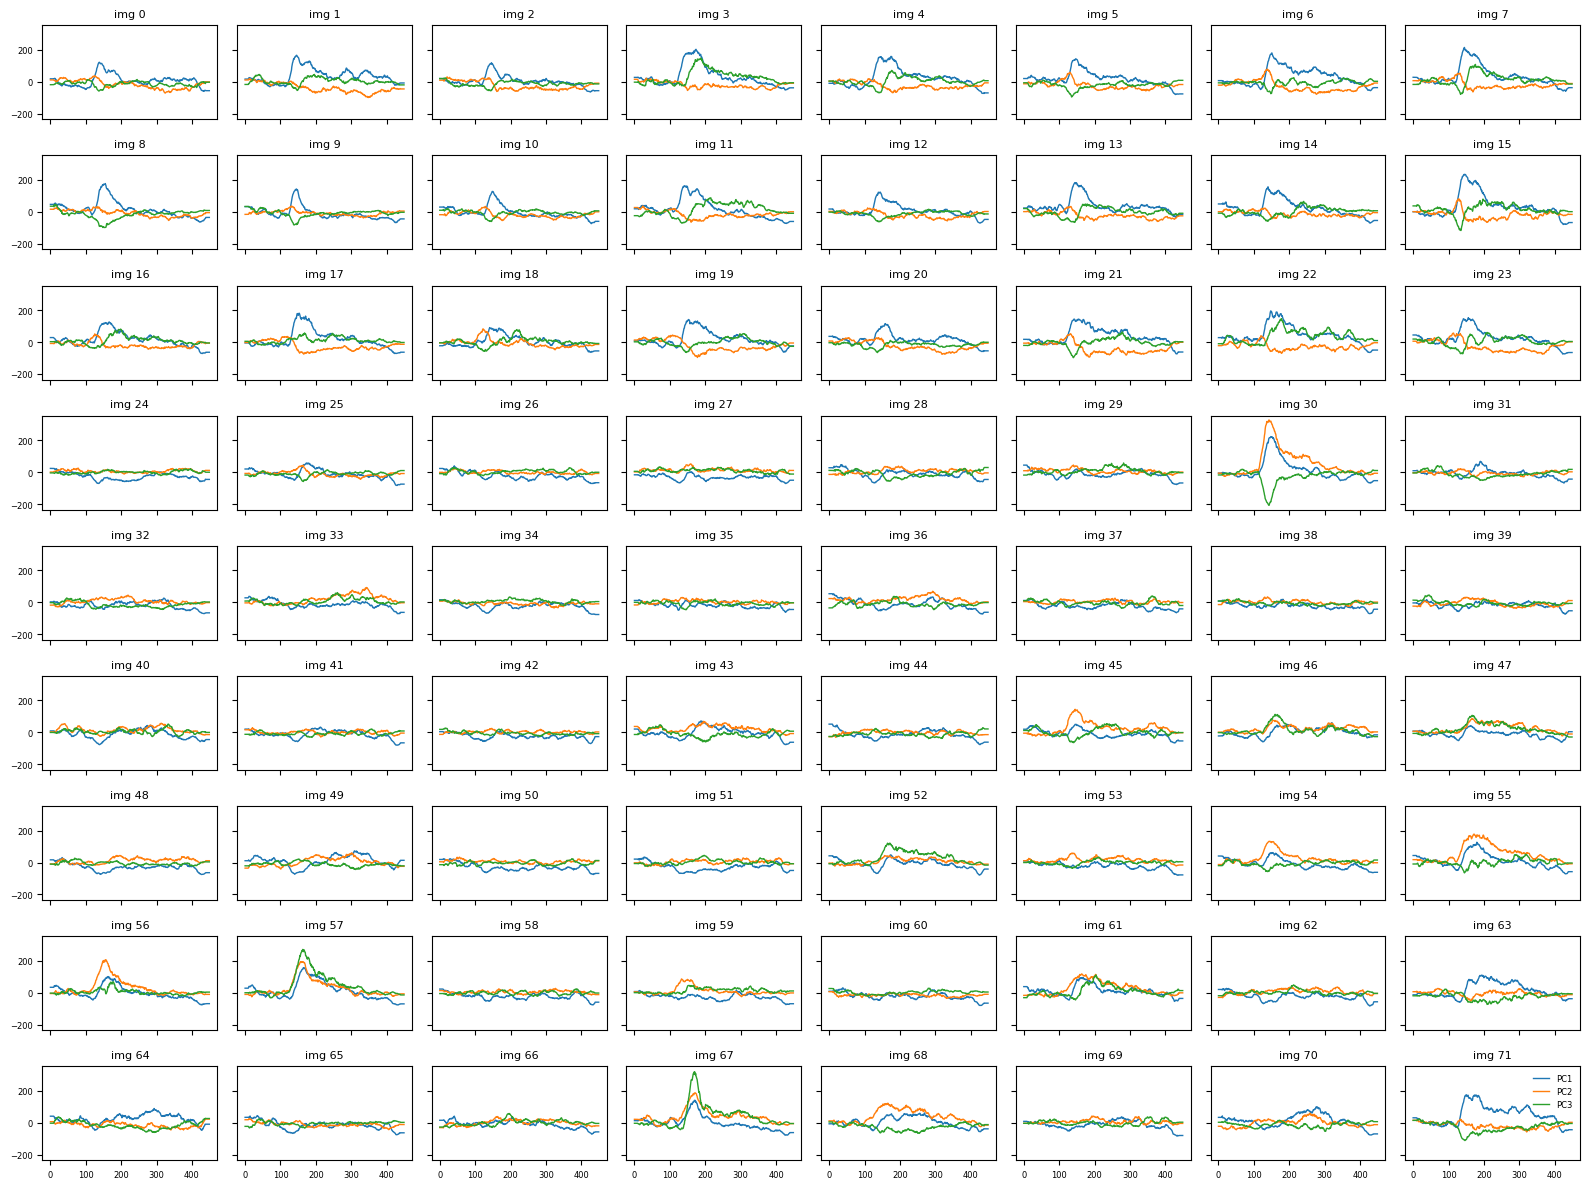

In [102]:
example_images = np.arange(lowd.shape[1])
colors = sns.color_palette('cividis', len(example_images))

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
for pc, ax in enumerate(axes):
    for idx, c in zip(example_images, colors):
        ax.plot(lowd[:, idx, pc], color=c, alpha=0.5, linewidth=1)
    ax.set_title(f"PC{pc+1}")
axes[0].set_xlabel("Time"); axes[1].set_xlabel("Time"); axes[2].set_xlabel("Time")
plt.tight_layout(); plt.show()

# ---------- Version B: 72 subplots (one per image), each shows its 3 PCs ----------
rows, cols = 9, 8  # 9*8 = 72
fig, axes = plt.subplots(rows, cols, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.ravel()
for ax, idx in zip(axes, example_images):
    ax.plot(lowd[:, idx, 0], linewidth=1, label="PC1")
    ax.plot(lowd[:, idx, 1], linewidth=1, label="PC2")
    ax.plot(lowd[:, idx, 2], linewidth=1, label="PC3")
    ax.set_title(f"img {idx}", fontsize=8)
    ax.tick_params(labelsize=6)
# optional tiny legend on the last subplot only
axes[-1].legend(fontsize=6, frameon=False, loc="upper right")
plt.tight_layout(); plt.show()